In [1]:
pip install numpy scikit-learn seaborn joblib imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\prith\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\prith\AppData\Local\Temp\ipykernel_11316\776368157.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



🔹 Logistic Regression Model Performance:
✅ Accuracy: 0.9133
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       318
           1       0.96      0.90      0.93       536

    accuracy                           0.91       854
   macro avg       0.90      0.92      0.91       854
weighted avg       0.92      0.91      0.91       854


🔹 Random Forest Model Performance:
✅ Accuracy: 0.9368
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       318
           1       0.96      0.94      0.95       536

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.93       854
weighted avg       0.94      0.94      0.94       854


🔹 SVM Model Performance:
✅ Accuracy: 0.9297
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       318
           1       0.99      0.90      0.94       536

    accuracy         

C:\Users\prith\AppData\Local\Temp\ipykernel_11316\776368157.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


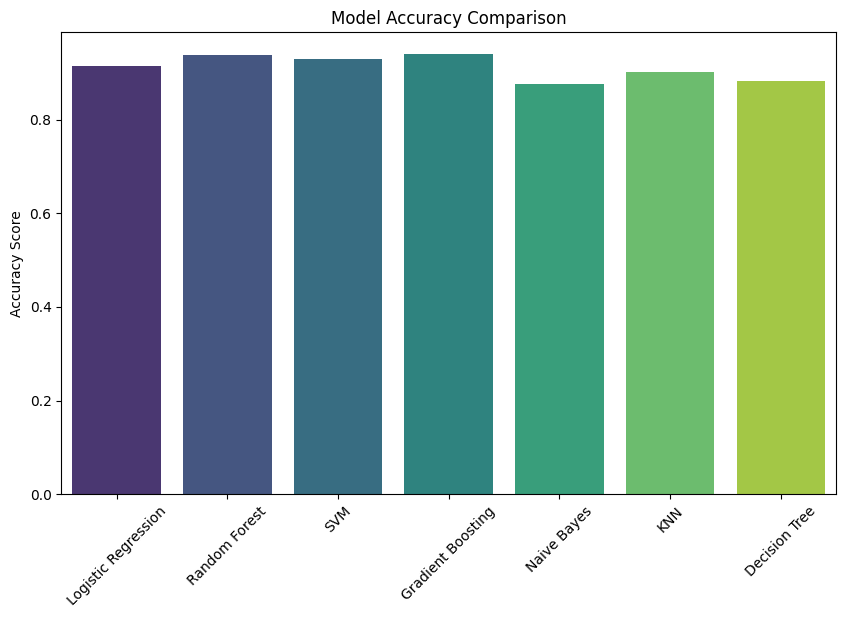

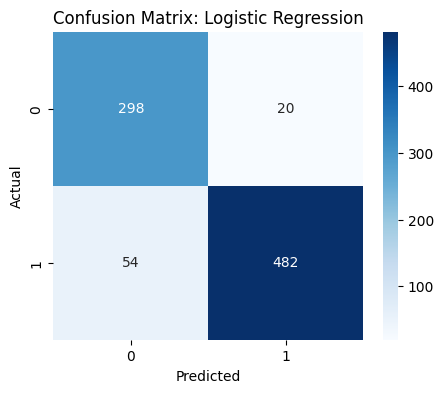

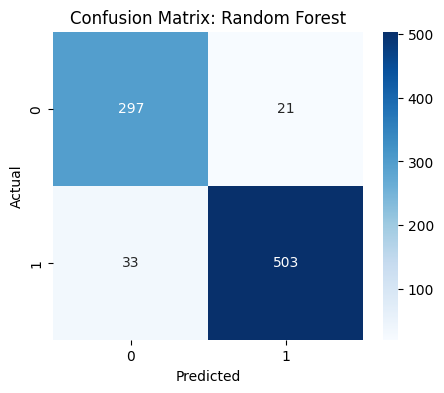

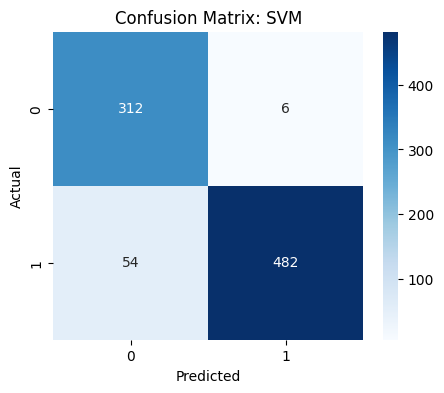

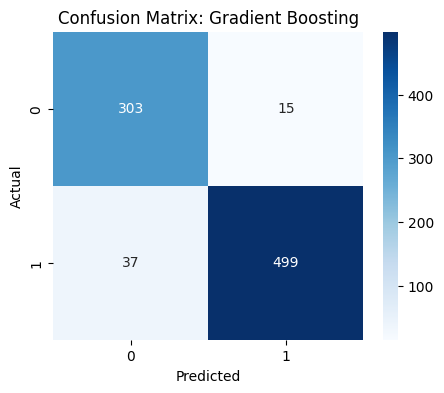

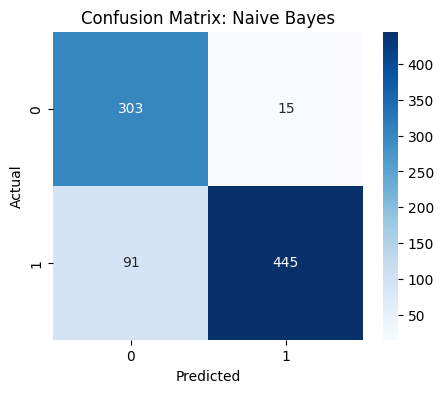

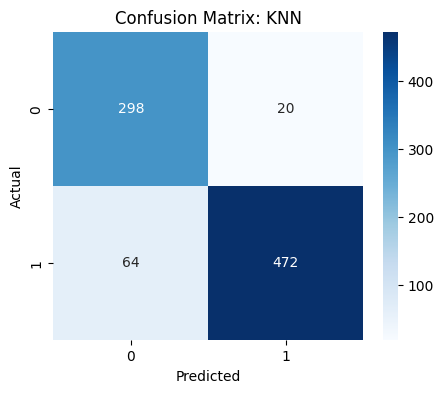

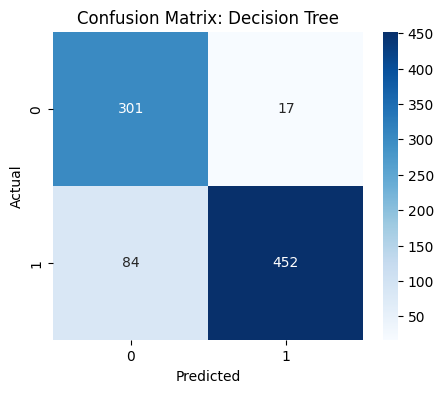


🏆 Best Performing Model: Gradient Boosting (Accuracy: 0.9391)
✅ Best model and preprocessing files saved successfully!


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Data Cleaning
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Convert categorical values
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Drop unnecessary columns
df.drop(columns=['loan_id'], inplace=True)

# Split dataset
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train,y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=8)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

# Dimensionality Reduction
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10)
}

# Train and Evaluate Models
accuracies = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    
    print(f"\n🔹 {name} Model Performance:")
    print(f"✅ Accuracy: {accuracies[name]:.4f}")
    print(classification_report(y_test, y_pred))

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()

# Plot Confusion Matrices
for name, matrix in confusion_matrices.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Find the best performing model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print(f"\n🏆 Best Performing Model: {best_model_name} (Accuracy: {accuracies[best_model_name]:.4f})")

# Save the best model and preprocessing objects
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selector, "selector.pkl")
joblib.dump(pca, "pca.pkl")

print("✅ Best model and preprocessing files saved successfully!")
